In [81]:
import io
import json
import numpy as np
import boto3
from matplotlib import pyplot
from matplotlib.legend_handler import HandlerTuple
from matplotlib import cm

NS_TO_MS = 1000000

In [61]:

start = 1_000_000_000/NS_TO_MS  #int
stop = [x/NS_TO_MS for x in [2_000_000_000,1_980_000_000]]  #list
runtime_fetchImage = 100_000_000/NS_TO_MS


runtime_recognizeFaces = [x/NS_TO_MS for x in [200_000_000,180_000_000,190_000_000,195_000_000,185_000_000]]  #list
start_recognizeFaces = runtime_fetchImage

runtime_cropSortFaces = [x/NS_TO_MS for x in [380_000_000,390_000_000,395_000_000,385_000_000,400_000_000]]  #list
start_cropSortFaces = max([x+start_recognizeFaces for x in runtime_recognizeFaces])

runtime_createCollage = [x/NS_TO_MS for x in [90_000_000,100_000_000]]  #list
start_createCollage = max([x+start_cropSortFaces for x in runtime_cropSortFaces])

runtime_list = [runtime_recognizeFaces,runtime_cropSortFaces,runtime_createCollage]
start_list = [start_recognizeFaces, start_cropSortFaces, start_createCollage]
runtime_labels = ["Total Runtime",
                  "Runtime fetchImage",
                  "Runtime recognizeFaces",
                  "Runtime cropSortFaces",
                  "Runtime createCollage"]

total_runtime = max(stop) - start

0.2 0.5
0.2 0.5
0.5 0.35


[]

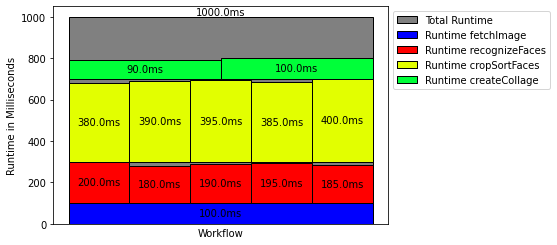

In [109]:
plt, ax = pyplot.subplots(1,1)
X = 1
t = ax.bar(X-0.1, total_runtime, color="grey",width=1,linewidth=1.0, edgecolor ="black")
rf = ax.bar(X- 0.1, runtime_fetchImage, color="blue",width=1,linewidth=1.0, edgecolor ="black")

bottom = runtime_fetchImage
rts = [t, rf]
for i, l in enumerate(runtime_list):
    width = 1/len(l)
    offset = len(l)/2*width if len(l)%2 > 0 else len(l)/2*width - 0.15
    print(width,offset)
    color = cm.hsv(i / 16*len(runtime_list))

    temp_tup = ()
    for j, runtime in enumerate(l):
        tmp = ax.bar(X- offset + j * width, runtime, width=width, bottom=start_list[i], linewidth=1.0, edgecolor ="black", color=color, align="center")
        temp_tup += (tmp,)
    rts.append(temp_tup)
    bottom += max(l)

for i,rect in enumerate(ax.patches):
    ax.annotate(xy=(rect.get_x()+rect.get_width()/2., int(rect.get_y()+rect.get_height()/2) if i > 0 else int(rect.get_height()+rect.get_height()/50)),
                ha='center',
                va='center',
                xytext=(0, 0),
                textcoords='offset points',
               text=f"{rect.get_height()}ms")

ax.legend(rts, runtime_labels, handler_map={tuple: HandlerTuple()},bbox_to_anchor=(1,1), loc="upper left")
ax.set_ylabel("Runtime in Milliseconds")
ax.set_xlabel("Workflow")
ax.set_xticks([]) 

In [ ]:
plt.show()